In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

In [2]:
resultI = pd.read_csv("Result/Ind_inf_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.csv")

In [3]:
rW = np.array(resultI["WCCn"])
rT = np.array(resultI["Time"])

#n=np.arange(192)+0.3
#for ind in :
 #   plt.plot()
#plt.show()

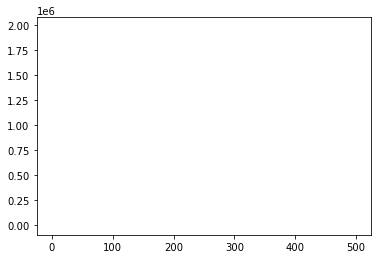

In [4]:
count=0
for i in range(len(rW)):
    try:
        rW[i]=np.mat(rW[i])
        rT[i]=np.mat(rT[i])
        plt.plot(rT[i],rW[i],)
    except:
        count+=1
        print(count)

In [14]:
resultA = pd.read_csv("Result/AveGenSub_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.csv")
resultA

,Unnamed: 0,Generation,Environment (LD=0 or DD=1),Expresion and repression constants,Constant of light rate,Disociation constants,Hill exponents,Fitness
0,0,1.0,0,[2.98908823e+06 1.20757351e+00 9.02653677e+01 ...,0.099762,[1.20035931e-08 7.51049588e+05 1.25000000e+05 ...,[2. 2.00283337 2.9790946 3.0236786 ],3.605056e-03
1,1,2.0,0,[3.03107737e+06 1.23072979e+00 9.18788418e+01 ...,0.100681,[1.19743178e-08 7.51279213e+05 1.27018737e+05 ...,[1.96920323 2.01826853 2.95061896 3.0816592 ],2.194622e-06
2,2,3.0,0,[3.05786882e+06 1.24608604e+00 9.30550519e+01 ...,0.101250,[1.16885510e-08 7.37954522e+05 1.28401876e+05 ...,[1.94810278 2.00949513 2.9198043 3.16763325],3.060166e-06
3,3,4.0,0,[3.04128099e+06 1.28391300e+00 9.93320061e+01 ...,0.099145,[1.15947381e-08 7.21587387e+05 1.29432942e+05 ...,[1.93237339 1.99101516 2.89325165 3.38400545],1.220286e-07
4,4,5.0,0,[3.11623159e+06 1.26937203e+00 9.98419438e+01 ...,0.098556,[1.16442521e-08 7.11252440e+05 1.31873922e+05 ...,[1.79012312 1.96373793 2.84287458 3.42459174],8.644082e-07
...,...,...,...,...,...,...,...,...
245,245,246.0,0,[4.34958505e+06 6.53308875e+00 7.90733445e+02 ...,0.132195,[4.26304084e-08 7.13532713e+05 1.33879596e+05 ...,[10.80249323 1.07203061 18.17335675 3.78913717],6.564441e-09
246,246,247.0,0,[4.34210061e+06 6.57746202e+00 8.13764611e+02 ...,0.135568,[4.13389542e-08 7.28751609e+05 1.33626393e+05 ...,[10.95291042 1.15453829 16.29020291 3.33326035],6.048993e-09
247,247,248.0,0,[4.77165337e+06 6.12710247e+00 8.16998968e+02 ...,0.151216,[4.38038279e-08 7.58999846e+05 1.26220625e+05 ...,[12.11465867 1.18636252 17.68041943 3.42455578],5.835254e-09
248,248,249.0,0,[4.80695713e+06 6.08574817e+00 8.12064688e+02 ...,0.152695,[4.05991757e-08 7.30661425e+05 1.17426335e+05 ...,[11.60566111 1.20745797 18.90010055 3.31244642],6.758939e-09


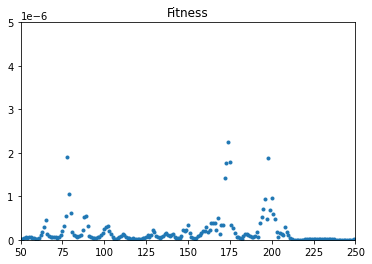

In [12]:
plt.plot(resultA["Fitness"],'.')
plt.title("Fitness")
plt.xlim([50,250])
plt.ylim([0,0.5e-5])
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

In [15]:
ERk = [[0]*23]
for k in resultA["Expresion and repression constants"]:
    ERk = np.append(ERk,np.mat(k)[0],axis=0)

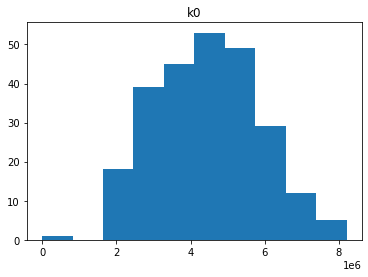

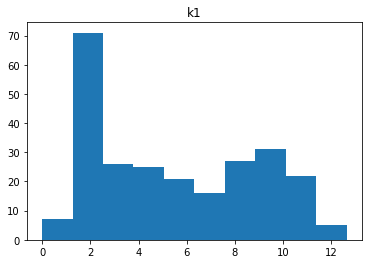

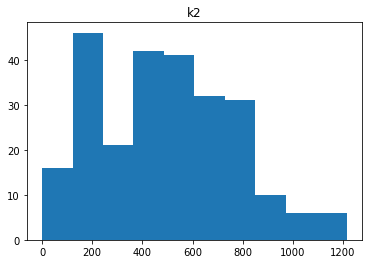

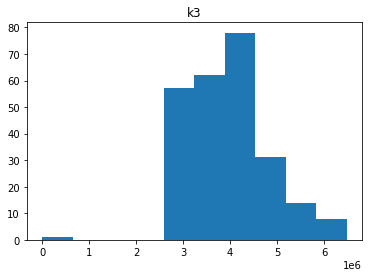

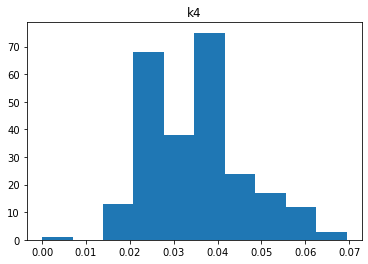

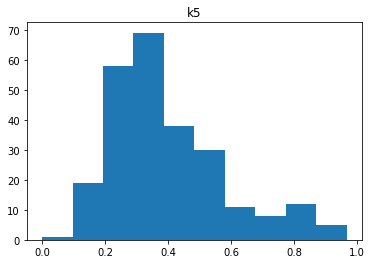

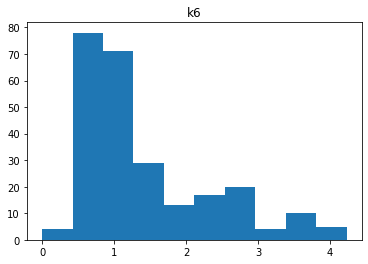

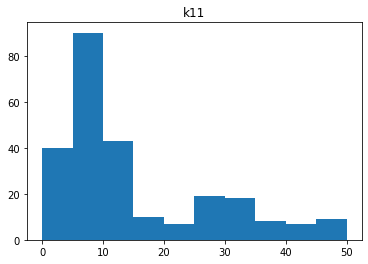

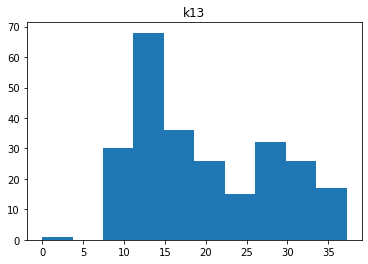

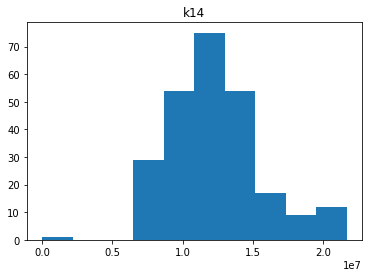

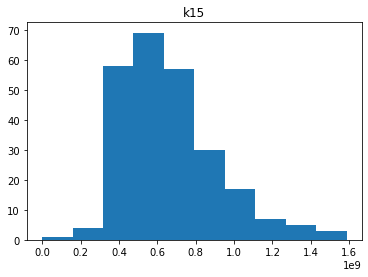

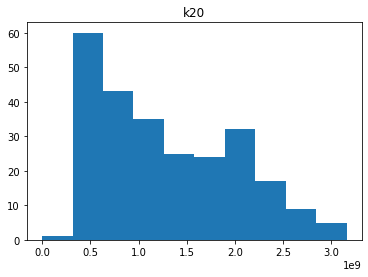

In [16]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.hist(ERk[:,i])
        plt.title("k{}".format(i))
        plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
        plt.show()

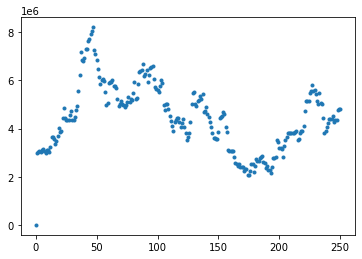

In [17]:
plt.plot(ERk[:,0],'.')

In [8]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(resultA[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

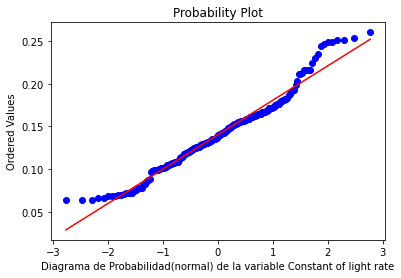

In [9]:
normalidad_variable_numerica("Constant of light rate")

In [10]:
nH = [[0]*4]
for n in resultA["Hill exponents"]:
    nH = np.append(nH,np.mat(n)[0],axis=0)
nH = nH[1:]

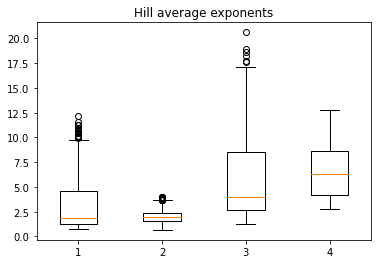

In [13]:
plt.boxplot(nH)
plt.title("Hill average exponents")
plt.savefig("Result/Hillexp_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()